In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Import the original images and cut them to size

Tower   has shape (576, 1024, 3) and dtype uint8
Dog     has shape (602, 1200, 3) and dtype uint8
New dog has shape (576, 1024, 3) and dtype uint8


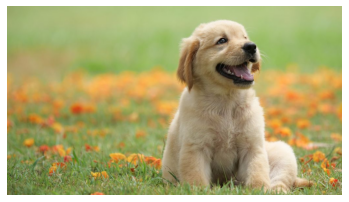

In [2]:
tower = plt.imread('original_images/tower.jpg')

height, width, channels = tower.shape
imagetype = tower.dtype
print(f"Tower   has shape {tower.shape} and dtype {tower.dtype}")

dog = plt.imread('original_images/dog.jpg')
print(f"Dog     has shape {dog.shape} and dtype {dog.dtype}")

dog = dog[0:height, 0:width]
print(f"New dog has shape {dog.shape} and dtype {dog.dtype}")

plt.imshow(dog)
plt.axis('off');

assert dog.shape == tower.shape
assert dog.dtype == tower.dtype

## Quantize into 8-bit color space

Bin edges:         [  0  31  63  95 127 159 191 223 255]
Test image values: [  0  36  72 109 145 182 218 255]
Hidden dog has dtype uint8
Successfully quantized dog image as [0 1 2 3 4 5 6 7]


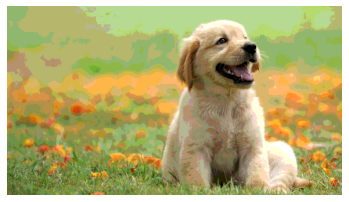

In [10]:
hidden_dog = dog.copy()
bits = 8
edges = np.linspace(start=0, stop=255, num=bits+1).astype(imagetype)
print(f"Bin edges:         {edges}")

for i in range(bits):
    low, high = edges[i], edges[i+1]
    in_interval = np.logical_and(low < dog, dog <= high)
    hidden_dog[in_interval] = i

step = 255.0 / bits
test_dog = (hidden_dog * 255.0 / hidden_dog.max()).astype(np.uint8)
plt.imshow(test_dog)
plt.axis('off')

print(f"Test image values: {np.unique(test_dog)}")
print(f"Hidden dog has dtype {hidden_dog.dtype}")
print("Successfully quantized dog image as", np.unique(hidden_dog))

plt.imsave('altered_images/dog.png', hidden_dog)

## Now use the reciprocal of the tower image

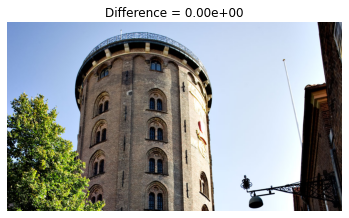

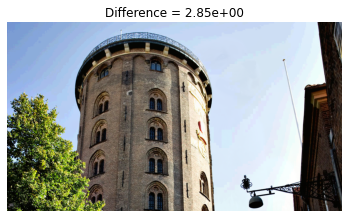

In [11]:
tower_quotient = tower // bits
tower_remainder = tower % bits

reconstructed_tower = (tower_quotient * bits + tower_remainder).astype(imagetype)  # Get the original image
reconstruction_difference = np.sqrt(np.mean(np.square(tower - reconstructed_tower)))

plt.imshow(reconstructed_tower)
plt.title(f'Difference = {reconstruction_difference:.2e}')
plt.axis('off')
plt.show()

new_tower = (tower_quotient * bits + hidden_dog).astype(imagetype) # Now contains remainder of dog image
reconstruction_difference = np.sqrt(np.mean(np.square(tower - new_tower)))

plt.imshow(new_tower)
plt.title(f'Difference = {reconstruction_difference:.2e}')
plt.axis('off')
plt.show();


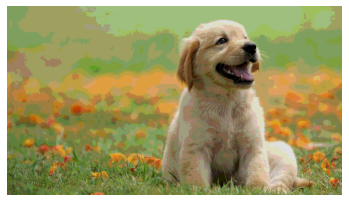

In [12]:
see_dog = ((new_tower % bits) * step).astype(np.uint8)

plt.imshow(see_dog)
plt.axis('off');

In [13]:
plt.imsave('altered_images/tower.tiff', new_tower)